In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [14]:
images_dir = r"C:\Users\Vikas\Documents\CardlessATM\Datasets\Face Images"

In [15]:
batch_size = 10
img_height = 255
img_width = 255

In [16]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  images_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 203 files belonging to 2 classes.
Using 163 files for training.


In [17]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  images_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 203 files belonging to 2 classes.
Using 40 files for validation.


In [18]:
class_names = train_ds.class_names
print(class_names)

['Suraj', 'Vikas']


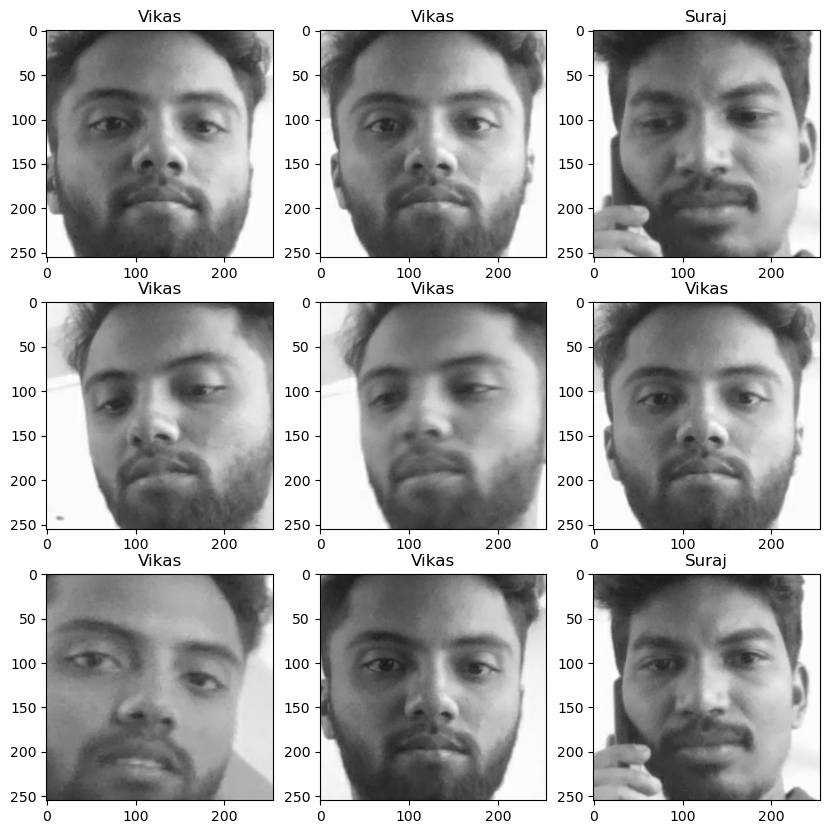

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

In [20]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(10, 255, 255, 3)
(10,)


In [21]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [22]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.09943796 1.0


In [26]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='sigmoid'),
  layers.Dense(num_classes)
])

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 255, 255, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 255, 255, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        1

In [28]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
17/17 [==============================] - 11s 521ms/step - loss: 1.3584 - accuracy: 0.5706 - val_loss: 0.2664 - val_accuracy: 1.0000
Epoch 2/15
17/17 [==============================] - 8s 478ms/step - loss: 0.1741 - accuracy: 0.9571 - val_loss: 0.0397 - val_accuracy: 1.0000
Epoch 3/15
17/17 [==============================] - 8s 480ms/step - loss: 0.0919 - accuracy: 0.9755 - val_loss: 0.0317 - val_accuracy: 1.0000
Epoch 4/15
17/17 [==============================] - 8s 482ms/step - loss: 0.0628 - accuracy: 0.9877 - val_loss: 0.0347 - val_accuracy: 1.0000
Epoch 5/15
17/17 [==============================] - 8s 480ms/step - loss: 0.0502 - accuracy: 0.9877 - val_loss: 0.0769 - val_accuracy: 0.9750
Epoch 6/15
17/17 [==============================] - 8s 481ms/step - loss: 0.0482 - accuracy: 0.9877 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 7/15
17/17 [==============================] - 9s 490ms/step - loss: 0.0276 - accuracy: 0.9939 - val_loss: 0.0561 - val_accuracy: 1.0000
Epoch

In [31]:
best_train_accuracy = history.history['accuracy'][-1]
best_val_accuracy = history.history['val_accuracy'][-1]

print("Training Accuracy: ", best_train_accuracy)
print("Validation Accuracy: ", best_val_accuracy)

Training Accuracy:  0.9938650131225586
Validation Accuracy:  1.0


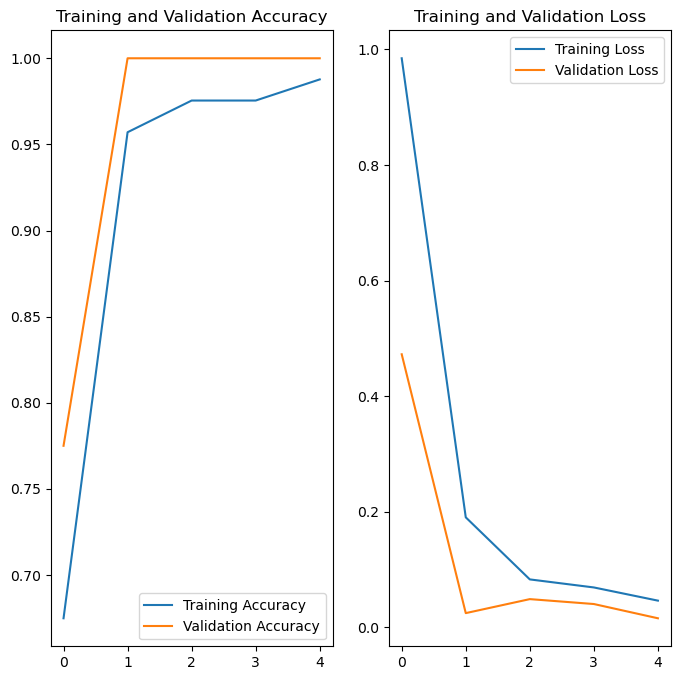

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
model.save("Cardless_face_Model.h5")

C:\Users\Vikas\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [19]:
images_dir = r"C:\Users\Vikas\Documents\CardlessATM\Datasets\Finger Images"

In [20]:
batch_size = 32
img_height = 255
img_width = 255

In [21]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  images_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 60 files belonging to 2 classes.
Using 48 files for training.


In [22]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  images_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 60 files belonging to 2 classes.
Using 12 files for validation.


In [23]:
class_names = train_ds.class_names
print(class_names)

['Suraj', 'Vikas']


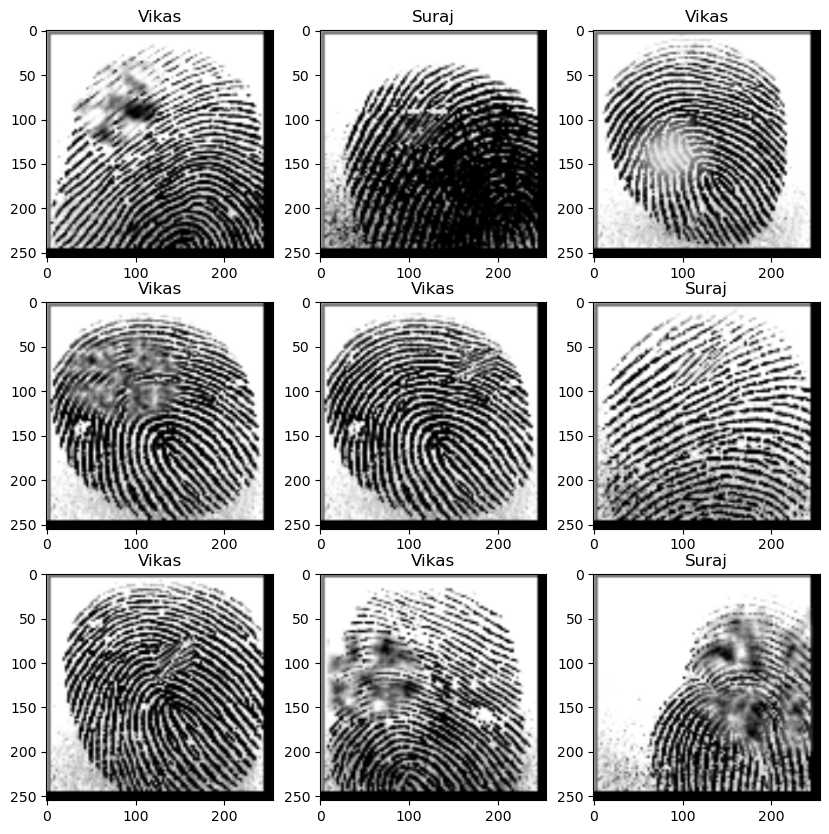

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

In [25]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 255, 255, 3)
(32,)


In [26]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [32]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='sigmoid'),
  layers.Dense(num_classes)
])

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 255, 255, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 255, 255, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 127, 127, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 63, 63, 64)       

In [35]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
17/17 [==============================] - 16s 717ms/step - loss: 0.8399 - accuracy: 0.6994 - val_loss: 0.2516 - val_accuracy: 1.0000
Epoch 2/15
17/17 [==============================] - 12s 713ms/step - loss: 0.0943 - accuracy: 0.9816 - val_loss: 0.0407 - val_accuracy: 1.0000
Epoch 3/15
17/17 [==============================] - 12s 719ms/step - loss: 0.0822 - accuracy: 0.9816 - val_loss: 0.0515 - val_accuracy: 0.9750
Epoch 4/15
17/17 [==============================] - 10s 608ms/step - loss: 0.0488 - accuracy: 0.9939 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 5/15
17/17 [==============================] - 10s 608ms/step - loss: 0.0319 - accuracy: 0.9939 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 6/15
17/17 [==============================] - 11s 620ms/step - loss: 0.0312 - accuracy: 0.9877 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 7/15
17/17 [==============================] - 13s 733ms/step - loss: 0.0258 - accuracy: 0.9939 - val_loss: 0.0323 - val_accuracy: 1.0000

In [36]:
best_train_accuracy = history.history['accuracy'][-1]
best_val_accuracy = history.history['val_accuracy'][-1]

print("Training Accuracy: ", best_train_accuracy)
print("Validation Accuracy: ", best_val_accuracy)

Training Accuracy:  0.987730085849762
Validation Accuracy:  1.0


In [31]:
model.save("Cardless_finger_Model.h5")